In [41]:
import tensorflow as tf

In [4]:
from tensorflow import keras

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import  matplotlib as mpl

import numpy as np
%matplotlib inline
import pandas as pd

In [28]:
mnist=tf.keras.datasets.mnist

In [29]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

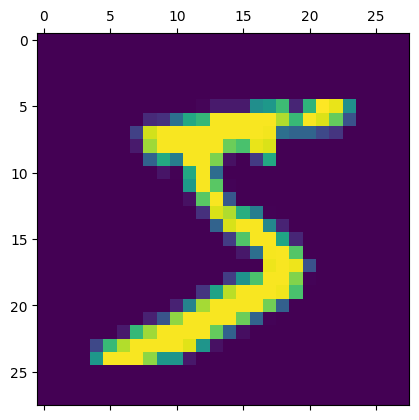

In [30]:
plt.matshow(x_train[0])

In [31]:
x_train=x_train/255
x_test=x_test/255

In [32]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [33]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [36]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6355 - accuracy: 0.8385 - val_loss: 0.3592 - val_accuracy: 0.9021
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3385 - accuracy: 0.9045 - val_loss: 0.2965 - val_accuracy: 0.9156
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2917 - accuracy: 0.9177 - val_loss: 0.2658 - val_accuracy: 0.9244
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2626 - accuracy: 0.9258 - val_loss: 0.2434 - val_accuracy: 0.9316
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2402 - accuracy: 0.9327 - val_loss: 0.2243 - val_accuracy: 0.9371
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2217 - accuracy: 0.9377 - val_loss: 0.2082 - val_accuracy: 0.9416
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2057 - accuracy: 0.9424 - val_loss: 0.1966 - val_accuracy:

In [37]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1638 - accuracy: 0.9527
Loss=0.164
Accuracy=0.953


In [38]:
import random

<function matplotlib.pyplot.show(close=None, block=None)>

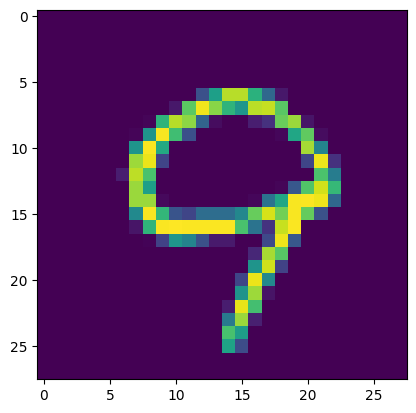

In [39]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [40]:
test_predict=model.predict(x_test)
test_predict_labels=np.argmax(test_predict,axis=1)
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=test_predict_labels)
print("confusion matrix \n",confusion_matrix)

313/313 [==============================] - 1s 2ms/step
confusion matrix 
 tf.Tensor(
[[ 963    0    1    2    0    5    6    2    1    0]
 [   0 1118    2    2    1    1    4    2    5    0]
 [   5    3  979    8    8    3    7    9    8    2]
 [   3    1   12  959    0    9    0   11    9    6]
 [   1    1    6    0  937    0    8    4    3   22]
 [   8    1    1   21    3  831   10    2    9    6]
 [   9    3    6    0    8    8  920    1    3    0]
 [   2    8   20    5    3    1    0  970    1   18]
 [   3    2    5   18    8   11    9   11  901    6]
 [   7    6    2    9   20    4    1   10    1  949]], shape=(10, 10), dtype=int32)
